In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from contextily import Place
import folium
from shapely.geometry import Polygon
import ast
import pandas as pd
from shapely.geometry import Point, LineString
from networkx.readwrite import json_graph
import json
import numpy as np
import random
from folium.plugins import MarkerCluster
from numpy.random import choice
import seaborn as sns

ox.settings.log_console = True

In [50]:
city_name = "Brasov, Romania"
G = ox.graph_from_place(city_name, network_type="drive", simplify=True)
# Ensure the graph is unprojected
graph_unprojected = ox.project_graph(G, to_crs='epsg:4326')
# Add edge bearings-directions, to the unprojected graph
graph_with_bearings = ox.add_edge_bearings(graph_unprojected)

########################################################################################################################
df_coordinates = ox.graph_to_gdfs(graph_with_bearings, edges=False)["geometry"].apply(lambda x: (x.x, x.y)).reset_index()
df_coordinates.columns = ["Node_ID", "Coordinates"]
df_coordinates[["Longitude","Latitude"]] = pd.DataFrame(df_coordinates["Coordinates"].tolist(), index=df_coordinates.index)
df_coordinates[["Longitude","Latitude"]] = pd.DataFrame(df_coordinates["Coordinates"].tolist(), index=df_coordinates.index)

# Generating OD matrix


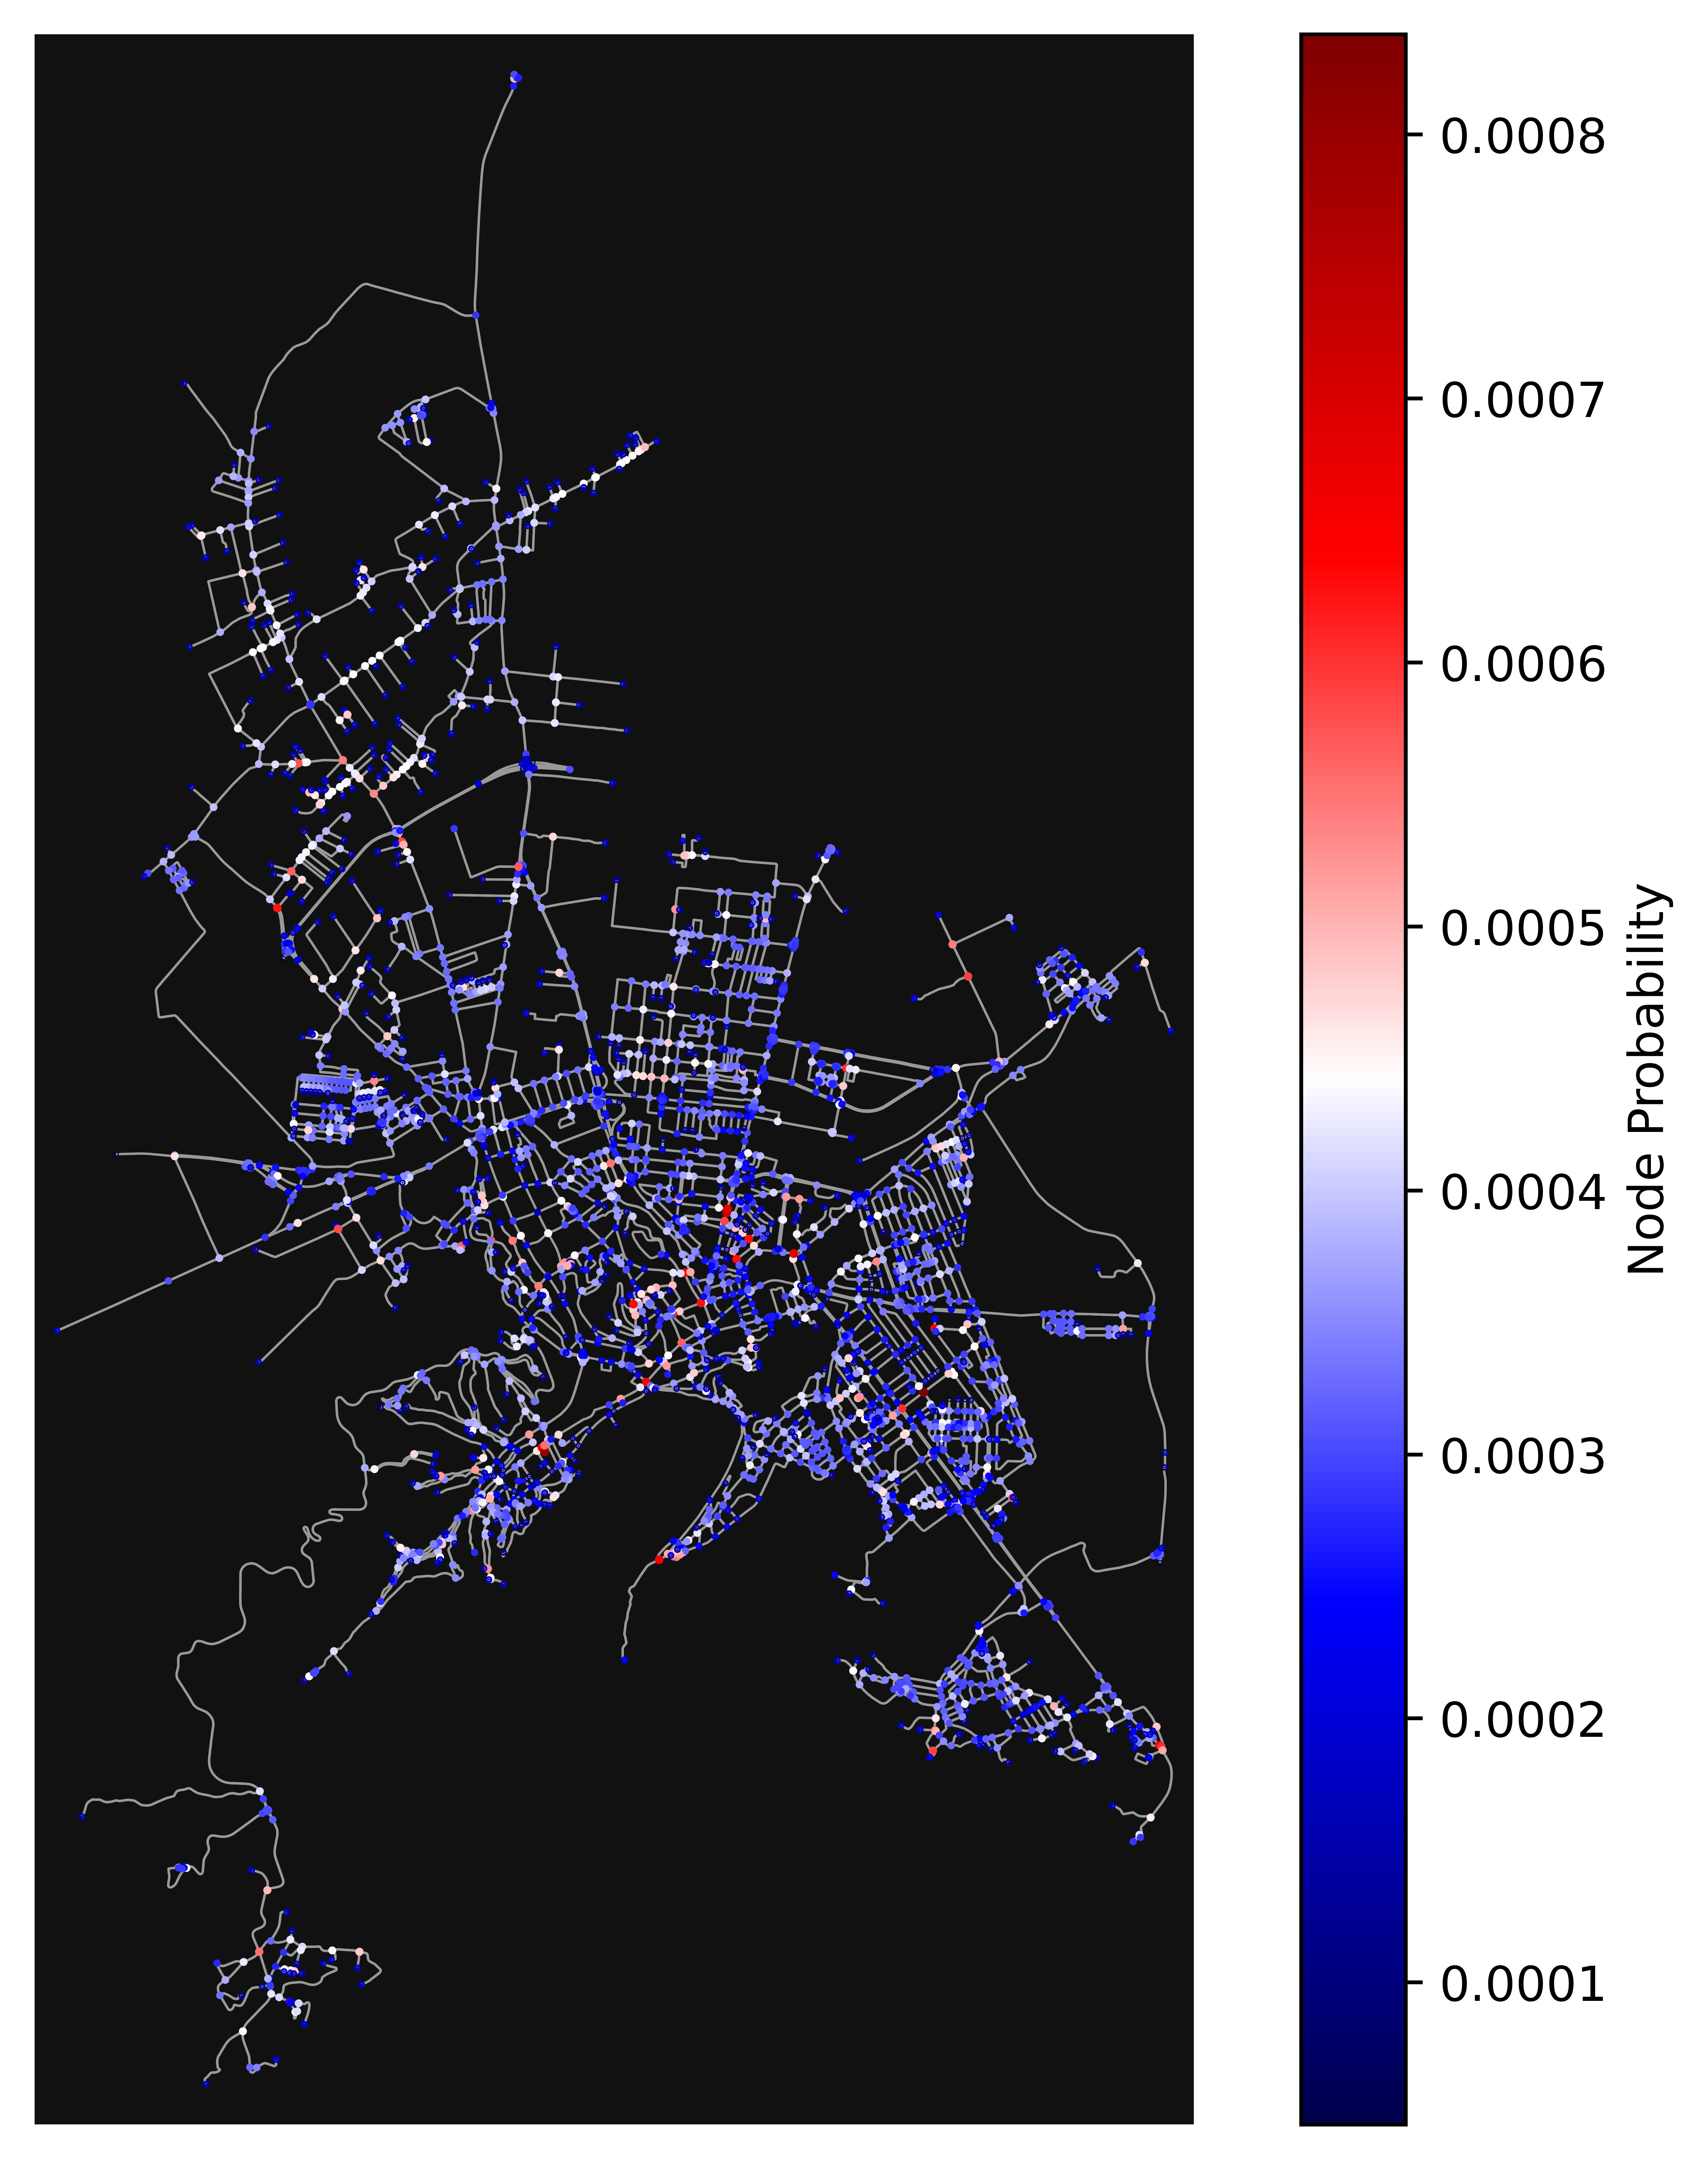

In [66]:
pr=nx.pagerank(graph_with_bearings)
# Assign probabilities to nodes
df_coordinates['probability'] = pr.values()

# Define node sizes and colors
node_sizes = [1000*prob for prob in df_coordinates['probability'] ]
node_colors = [probability for probability in df_coordinates['probability']]

# Visualization
plt.rcParams["figure.dpi"] = 1000
fig, ax = ox.plot_graph(
    graph_with_bearings, 
    node_size=node_sizes,
    node_color=node_colors, 
    edge_linewidth=0.5, 
    show=False, 
    close=False
)

# Add nodes with colors using scatter
sc = ax.scatter(
    df_coordinates['Longitude'],  
    df_coordinates['Latitude'],  
    c=node_colors, 
    s=node_sizes, 
    cmap=plt.cm.seismic,  
    zorder=5
)
# Add a colorbar for better interpretation
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Node Probability')

# Show the plot
plt.show()

In [ ]:
#n=100
#random_origin_nodes  = choice(df_coordinates.index,  min(n, len(df_coordinates)), p=df_coordinates.weight)
#random_destination_nodes  = choice(df_coordinates.index,  min(n, len(df_coordinates)), p=df_coordinates.weight)
#randomized_df = pd.DataFrame({
#    'Origin_Node_ID': random_origin_nodes,
#    'Origin_Coordinates': df_coordinates.loc[random_origin_nodes, 'Coordinates'].values,
#    'Destination_Node_ID': random_destination_nodes,
#    'Destination_Coordinates': df_coordinates.loc[random_destination_nodes, 'Coordinates'].values })

#randomized_df[['Origin_Longitude', 'Origin_Latitude']] = pd.DataFrame(randomized_df['Origin_Coordinates'].tolist(), index=randomized_df.index)
#randomized_df[['Destination_Longitude', 'Destination_Latitude']] = pd.DataFrame(randomized_df['Destination_Coordinates'].tolist(), index=randomized_df.index)
#selected_nodes=choice(list(graph_with_bearings.nodes),  min(n, len(df_coordinates)), p=df_coordinates.weight)
#df_coordinates['weight'] = pr.values()
#df_coordinates.to_csv('Data.csv')